# Climate Goals 2200

In [1]:
import fair
fair.__version__

'1.6.3'

In [2]:
%matplotlib inline

In [3]:
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
# plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['figure.figsize'] = (16, 9)

The “engine” of FaIR is the fair_scm function in the forward module.

In [4]:
from fair.forward import fair_scm

## The RCP scenarios

The Representative Concentration Pathway (RCP) scenarios are a set of scenarios of future greenhouse gas emissions that climate modelers use as input for their models. The numbers in the scenario refer to the approximate radiative forcing in these scenarios in the year 2100. The scenarios span a range of possible future emissions scenarios from a rapid cut in emissions (RCP2.6) to an extreme upper-end scenario (RCP8.5).

In the version of FaIR below CO2 emissions (not concentrations) are specified and the model predicts the evolution of CO2 concentrations. For the other greenhouse gases a radiative forcing is calculated. 

The code section below shows CO2 emissions, CO2 concentrations, total forcing, and temperature until 2500.

In [9]:
def get_CDR_anom(CDR_peak_GtC, start_year, ramp_up_years, steady_years, ramp_down_years, shape=(736,)):
    # CDR_peak_GtC - number of GtC removed at peak (-2 to remove 2 GtC)
    # start_year - year CDR anomaly starts
    # ramp_up_years, steady_years, ramp_down_years - Years to ramp up, stabilize, and ramp down.
    
    ystart = np.where(rcp26.Emissions.year == 2075)[0][0]
    
    CDR_anom = np.zeros(shape)
    
    x = 0. # starts at zero, counts up to ramp_up.
    y = ramp_down_years # counts down to zero.
    for idx in range(shape[0]):
        scale = 0.
        if idx >= ystart and idx <(ystart + ramp_up_years):
            x = x + 1.
            scale = x / ramp_up_years
        if idx >= (ystart + ramp_up_years) and idx <(ystart + ramp_up_years + steady_years):
            scale = 1.
        if idx >= (ystart + ramp_up_years + steady_years) and idx <(ystart + ramp_up_years + steady_years + ramp_down_years):
            y = y - 1
            scale = y / ramp_down_years
        CDR_anom[idx] = scale * CDR_peak_GtC
        
    return CDR_anom

736


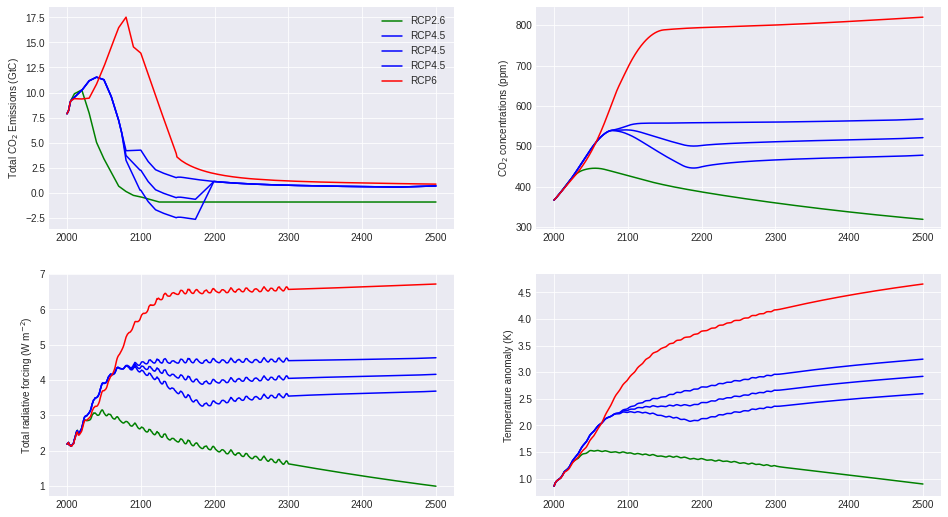

In [13]:
# Get RCP modules
from fair.RCPs import rcp26, rcp45, rcp60, rcp85

cdr_anom = get_CDR_anom(-2, 2075, 25, 75, 25)
print(len(cdr_anom))

# Basic RCP runs
C26, F26, T26 = fair.forward.fair_scm(emissions=rcp26.Emissions.emissions)
C45, F45, T45 = fair.forward.fair_scm(emissions=rcp45.Emissions.emissions)
C60, F60, T60 = fair.forward.fair_scm(emissions=rcp60.Emissions.emissions)
C85, F85, T85 = fair.forward.fair_scm(emissions=rcp85.Emissions.emissions)

# RCP 4.5 with CDR
rcp45_emissions_a = np.copy(rcp45.Emissions.emissions)
rcp45_emissions_a[:,1] = rcp45_emissions_a[:,1] + cdr_anom
C45a, F45a, T45a = fair.forward.fair_scm(emissions=rcp45_emissions_a)
rcp45_emissions_b = np.copy(rcp45.Emissions.emissions)
rcp45_emissions_b[:,1] = rcp45_emissions_b[:,1] + 2 * cdr_anom
C45b, F45b, T45b = fair.forward.fair_scm(emissions=rcp45_emissions_b)

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

y2k = np.where(rcp26.Emissions.year == 2000)[0][0]

ax1.plot(rcp26.Emissions.year[y2k:], rcp26.Emissions.co2_fossil[y2k:] + rcp26.Emissions.co2_land[y2k:], color='green', label='RCP2.6')
# just show CO2 conc.
ax2.plot(rcp26.Emissions.year[y2k:], C26[y2k:, 0], color='green')
# sum over axis 1 to get total ERF
ax3.plot(rcp26.Emissions.year[y2k:], np.sum(F26[y2k:,:], axis=1), color='green')
ax4.plot(rcp26.Emissions.year[y2k:], T26[y2k:], color='green')

ax1.plot(rcp45.Emissions.year[y2k:], rcp45.Emissions.co2_fossil[y2k:] + rcp45.Emissions.co2_land[y2k:], color='blue', label='RCP4.5')
ax2.plot(rcp45.Emissions.year[y2k:], C45[y2k:, 0], color='blue')
ax3.plot(rcp45.Emissions.year[y2k:], np.sum(F45[y2k:,:], axis=1), color='blue')
ax4.plot(rcp45.Emissions.year[y2k:], T45[y2k:], color='blue')

ax1.plot(rcp45.Emissions.year[y2k:], rcp45.Emissions.co2_fossil[y2k:] + rcp45.Emissions.co2_land[y2k:] + cdr_anom[y2k:], color='blue', label='RCP4.5')
ax2.plot(rcp45.Emissions.year[y2k:], C45a[y2k:, 0], color='blue')
ax3.plot(rcp45.Emissions.year[y2k:], np.sum(F45a[y2k:,:], axis=1), color='blue')
ax4.plot(rcp45.Emissions.year[y2k:], T45a[y2k:], color='blue')

ax1.plot(rcp45.Emissions.year[y2k:], rcp45.Emissions.co2_fossil[y2k:] + rcp45.Emissions.co2_land[y2k:] + 2*cdr_anom[y2k:], color='blue', label='RCP4.5')
ax2.plot(rcp45.Emissions.year[y2k:], C45b[y2k:, 0], color='blue')
ax3.plot(rcp45.Emissions.year[y2k:], np.sum(F45b[y2k:,:], axis=1), color='blue')
ax4.plot(rcp45.Emissions.year[y2k:], T45b[y2k:], color='blue')

ax1.plot(rcp60.Emissions.year[y2k:], rcp60.Emissions.co2_fossil[y2k:] + rcp60.Emissions.co2_land[y2k:], color='red', label='RCP6')
ax2.plot(rcp60.Emissions.year[y2k:], C60[y2k:, 0], color='red')
ax3.plot(rcp60.Emissions.year[y2k:], np.sum(F60[y2k:,:], axis=1), color='red')
ax4.plot(rcp60.Emissions.year[y2k:], T60[y2k:], color='red')

# ax1.plot(rcp85.Emissions.year[y2k:], rcp85.Emissions.co2_fossil[y2k:], color='black', label='RCP8.5')
# ax2.plot(rcp85.Emissions.year[y2k:], C85[y2k:, 0], color='black')
# ax3.plot(rcp85.Emissions.year[y2k:], np.sum(F85[y2k:,:], axis=1), color='black')
# ax4.plot(rcp85.Emissions.year[y2k:], T85[y2k:], color='black')

ax1.set_ylabel('Total CO$_2$ Emissions (GtC)')
ax1.legend()
ax2.set_ylabel('CO$_2$ concentrations (ppm)')
ax3.set_ylabel('Total radiative forcing (W m$^{-2}$)')
ax4.set_ylabel('Temperature anomaly (K)');